<a href="https://colab.research.google.com/github/hongrolee/Python/blob/main/colab/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%A4%91%EA%B8%89_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 누락 데이터 처리

## 1) 누락 데이터 확인

### 데이터 읽어오기

### 누락 확인하기

*   isnull() : 널 확인
*   notnull() : 널이 아닌 요소 확인



## 2) 누락 데이터 개수 확인하기

*   isnull().sum() : 누락값 개수 확인
*   isnull().sum(1) : 행 단위 누락값 개수 확인
*   notnull().sum(1) : 행 단위 실제값 개수 확인



## 3) 누락 데이터 제거하기



### 행 제거

* dropped_all_row = df.dropna(axis=0)



### 열 제거

*   dropped_all_column = df.dropna(axis=1)



### 특정 행 또는 열 제거

*   df[열이름].dropna()



### 누락값이 들어있는 행 모두 삭제

*   df[[열이름,...,열이름]].dropna(axis=0)



### 누락값이 들어있는 열 모두 삭제

*   df[[열이름, ..., 열이름]].dropna(axis=1)



## 4) 누락 데이터 수정



### 전체 누락값을 특정값(0)로 대체

*  fillna(0)



### 특정 열의 누락값을 특정값(0)로 대체

### 누락값을 문자열로 대체

### 열의 평균값으로 대체

### 특정 항목 평균으로 대체

### 특정 열에 대해서만 특정 열의 평균으로 대체

# 2. 이상 데이터 처리

*   이상 데이터 : 정상치에서 벗어난 데이터 (outlier), 자료에서 예상과는 다른 패턴을 보이는 개체 또는 자료



## 1) 이상 데이터 확인

### 파일 읽어오기



### 이상 데이터 확인

## 2) 이상 데이터 시각화

### 박스플롯을 이용한 시각화
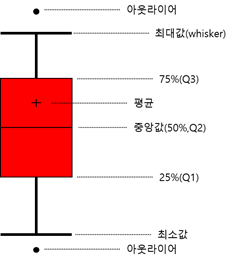

## 3) 이상 데이터 처리 방법

*   drop
*   update
*   다른 변수로 변환
*   resampling
*   case 분리 분석



# 4. 중복 데이터

## 1) 중복 데이터 확인

### 데이터 읽기

### 중복 데이터 찾기

*   duplicated()
*   True, False의 boolean 형태의 Series 반환



## 2) 중복 시작과 끝 확인
*   duplicated() keep 옵션 : 중복값이 있으면 처음이나 끝에 무엇을 남길지 확인
  *   keep = 'first' : 첫번째 중복값을 False로 표시하고, 나머지를 True로 표시
  *   keep = 'last'  : 마지막 중복값을 False로 표시하고, 나머지를 True로 표시
  *   keep = False   : 중복이면 무조건 모두다 True로 표시



## 3) 중복 데이터 제거

### 유일한 1개의 키만 남기고 나머지 중복 제거